In [2]:
from ui_lib import *
import cv2
import numpy as np
import matplotlib.pyplot as plt


c:\Users\Theo\Documents\Unif\ChimpRec\Code\Body_detection\Metric\.venv\lib\site-packages\torchreid\reid\metrics\rank.py:11: UserWarning: Cython evaluation (very fast so highly recommended) is unavailable, now use python evaluation.
  warnings.warn(


In [24]:
def draw_bbox(image, color, bbox, label):
    x1, y1, x2, y2, score = bbox
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

    cv2.rectangle(image, (x1, y1), (x2, y2), color, 4)
    label_text = f"{label}"#: {score:.2f}"
    (w, h), _ = cv2.getTextSize(label_text, cv2.FONT_HERSHEY_COMPLEX, 0.8, 1)

    overlay = image.copy()
    cv2.rectangle(overlay, (x2 - w - 10, y2 - h - 10), (x2, y2), color, -1)
    cv2.addWeighted(overlay, 0.5, image, 0.5, 0, image)

    cv2.putText(image, label_text, (x2 - w - 5, y2 - 5), cv2.FONT_HERSHEY_COMPLEX, 0.8, (255,255,255), 1)
    return image

In [4]:
def draw_triangle(image, color, bbox, label):

    x1, y1, x2, y2, score = bbox    
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    (text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_COMPLEX, 0.8, 1)

    # Triangle dimensions
    triangle_height = 20
    triangle_width = 20

    # Tip of triangle at the middle of the top edge of the bounding box
    tip_x = (x1 + x2) // 2
    tip_y = max(y1, text_height + triangle_height + 5)

    # Base is ABOVE the tip (Y decreases upward)
    base_y = tip_y - triangle_height
    half_base = triangle_width // 2

    pt_tip = (tip_x, tip_y)
    pt_left = (tip_x - half_base, base_y)
    pt_right = (tip_x + half_base, base_y)

    triangle = np.array([pt_tip, pt_left, pt_right], dtype=np.int32).reshape((-1, 1, 2))

    # Draw filled triangle
    cv2.fillPoly(image, [triangle], color)

    # Text position: centered horizontally, inside triangle
    text_x = tip_x - text_width // 2
    text_y = base_y + (triangle_height // 2) - triangle_height

    # Draw transparent rectangle using overlay
    overlay = image.copy()
    cv2.rectangle(overlay, (text_x - 5, text_y - text_height - 5), (text_x + text_width + 5, text_y + 5), color, -1)
    alpha = 0.6  # Transparency factor
    cv2.addWeighted(overlay, alpha, image, 1-alpha, 0, image)

    # Draw label text on top
    cv2.putText(image, label, (text_x, text_y), cv2.FONT_HERSHEY_COMPLEX, 0.8, (255, 255, 255), 1)

    return image


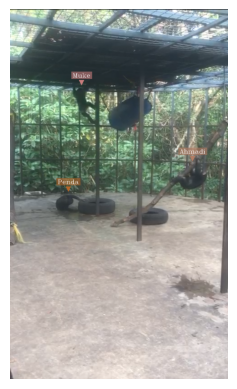

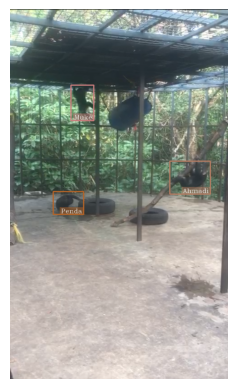

In [ ]:
background_path="C:/Users/Theo/Documents/Unif/ChimpRec/Code/Annotation_visu/3.png"
output_path="C:/Users/Theo/Documents/Unif/ChimpRec/Code/Tracking/user_interaction/"

background = cv2.imread(background_path)

output = draw_triangle(background, (125, 125, 200), (280, 300, 285, 600, 1), "Muke")
output = draw_triangle(output, (100, 125, 180), (720, 600, 720, 600, 1), "Ahmadi")
output = draw_triangle(output, (40, 100, 180), (230, 720, 230, 720, 1), "Penda")
cv2.imwrite(f"{output_path}/after.png", output)
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(output_rgb)
plt.axis('off')  # Hide axes
plt.show()

background_2 = cv2.imread(background_path)

output_2 = draw_bbox(background_2, (125, 125, 200), (240, 300, 330, 440, 1), "Muke")
output_2 = draw_bbox(output_2, (100, 125, 180), (630, 600, 790, 730, 1), "Ahmadi")
output_2 = draw_bbox(output_2, (40, 100, 180), (170, 720, 290, 810, 1), "Penda")
cv2.imwrite(f"{output_path}/before.png", output_2)

output_rgb_2 = cv2.cvtColor(output_2, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(output_rgb_2)
plt.axis('off')  # Hide axes
plt.show()


In [27]:
import time

start = time.time()
for i in range(100000):
    draw_bbox(background, (125, 125, 200), (240, 300, 330, 440, 1), "Muke")
print(time.time() - start)

start = time.time()
for i in range(100000):
    draw_triangle(background, (125, 125, 200), (240, 300, 330, 440, 1), "Muke")
print(time.time() - start)

214.3060817718506
228.59558248519897
